In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df= pd.read_csv("kpop_rankings.csv")

# Create a DataFrame
df = pd.DataFrame(data = df)
df

,year,time,rank,song_title,artist,album
0,2010,1,1,우리 사랑하게 됐어요.,"가인, 조권",우리 사랑하게 됐어요
1,2010,1,2,처음처럼 그때처럼 (Feat. 강민경),이승기,Shadow (Repackage)
2,2010,1,3,그대라서,거미,크리스마스에 눈이 올까요? OST
3,2010,1,4,Bo Peep Bo Peep,티아라 (T-ara),Absolute First Album
4,2010,1,5,술 한잔 해요,지아 (Zia),Atelier
...,...,...,...,...,...,...
66695,2023,44,196,BETELGEUSE,Yuuri,BETELGEUSE
66696,2023,44,197,Vancouver,BIG Naughty (서동현),Lovey Dovey
66697,2023,44,198,Bye bye my blue,백예린,Bye bye my blue
66698,2023,44,199,사랑이라 믿었던 것들은 (Feat. 이수현),BIG Naughty (서동현),호프리스 로맨틱


In [10]:
dropped = 'song_title'
df = df.drop(dropped, axis=1)
df

,year,time,rank,artist,album
0,2010,1,1,"가인, 조권",우리 사랑하게 됐어요
1,2010,1,2,이승기,Shadow (Repackage)
2,2010,1,3,거미,크리스마스에 눈이 올까요? OST
3,2010,1,4,티아라 (T-ara),Absolute First Album
4,2010,1,5,지아 (Zia),Atelier
...,...,...,...,...,...
66695,2023,44,196,Yuuri,BETELGEUSE
66696,2023,44,197,BIG Naughty (서동현),Lovey Dovey
66697,2023,44,198,백예린,Bye bye my blue
66698,2023,44,199,BIG Naughty (서동현),호프리스 로맨틱


In [11]:
dropped = 'artist'
df = df.drop(dropped, axis=1)
df

,year,time,rank,album
0,2010,1,1,우리 사랑하게 됐어요
1,2010,1,2,Shadow (Repackage)
2,2010,1,3,크리스마스에 눈이 올까요? OST
3,2010,1,4,Absolute First Album
4,2010,1,5,Atelier
...,...,...,...,...
66695,2023,44,196,BETELGEUSE
66696,2023,44,197,Lovey Dovey
66697,2023,44,198,Bye bye my blue
66698,2023,44,199,호프리스 로맨틱


Mean Squared Error: 220.7736882624204


C:\Users\glory\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


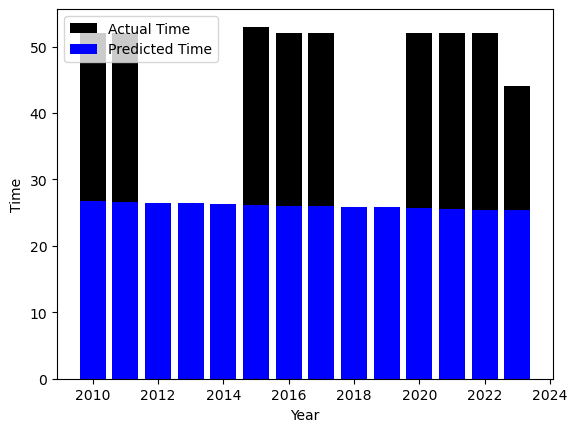

In [21]:
# Prepare features (X) and target variable (y)
X = df[['year', 'rank']]
y = df['time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predictions
plt.bar(X_test['year'], y_test, color='black', label='Actual Time')
plt.bar(X_test['year'], y_pred, color='blue', label='Predicted Time')
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend()
plt.show()